In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

In [2]:
file_name = "center_sternum.txt"
df_stern_data = pd.read_csv(file_name, sep="\t")
print(df_stern_data.head)


<bound method NDFrame.head of        Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX

In [3]:
delta_time = 1/200
current_time = 0
times = []
for index in range(len(df_stern_data)):
    times.append(current_time)
    current_time += delta_time
#print(times)
df_stern_data["time"] = times
#print(df_stern_data)
df_stern_data.time = df_stern_data.time.astype(float).round(4)
print(df_stern_data.columns)


Index(['Log Mode', 'Log Freq', 'Timestamp', 'AccX', 'AccY', 'AccZ', 'GyroX',
       'GyroY', 'GyroZ', 'MagnX', 'MagnY', 'MagnZ', 'qw', 'qi', 'qj', 'qk',
       'time'],
      dtype='object')


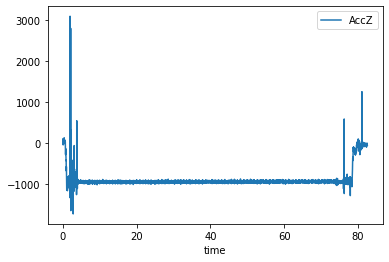

In [4]:
df_stern_data.plot(x="time", y="AccZ")
plt.show()

In [5]:
df_clean_stern_data = df_stern_data[(df_stern_data.time > 22) & (df_stern_data.time < 25)]

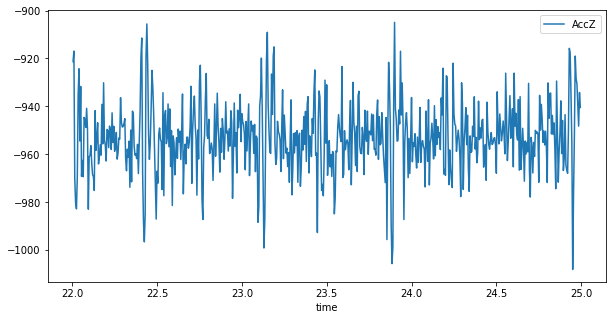

In [6]:
df_clean_stern_data.plot(x="time", y="AccZ", figsize=(10,5))
plt.show()

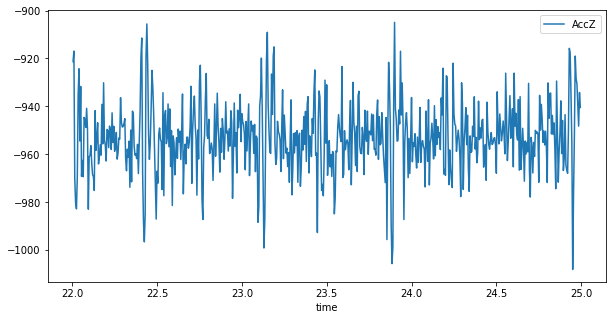

In [7]:
df_clean_stern_data.plot(x="time", y="AccZ", figsize=(10,5))
plt.show()

In [50]:
b, a = signal.butter(4,2,"lowpass",fs=200)  

In [51]:
result = signal.filtfilt(b,a,df_clean_stern_data['GyroX'])

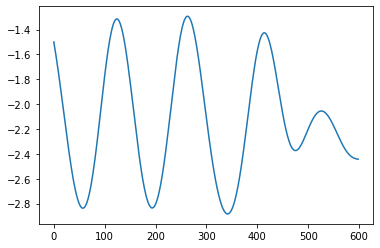

(array([124, 263, 414, 526], dtype=int64), {})


In [52]:
df_clean = pd.DataFrame(result)
plt.plot(result)

plt.show()

peaks = signal.find_peaks(result)
print(peaks)